<a href="https://colab.research.google.com/github/dikoharyadhanto/AI-Deep-Learning-Documentation/blob/main/SVM_untuk_Klasifikasi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Overview**

Support Vector Machine adalah model ML multifungsi yang dapat digunakan untuk menyelesaikan permasalahan klasifikasi, regresi, dan pendeteksian outlier. Termasuk ke dalam kategori supervised learning, SVM adalah salah satu metode yang paling populer dalam machine learning.

Tujuan dari algoritma SVM adalah untuk menemukan hyperplane terbaik dalam ruang berdimensi-N (ruang dengan N-jumlah fitur) yang berfungsi sebagai pemisah yang jelas bagi titik-titik data input.

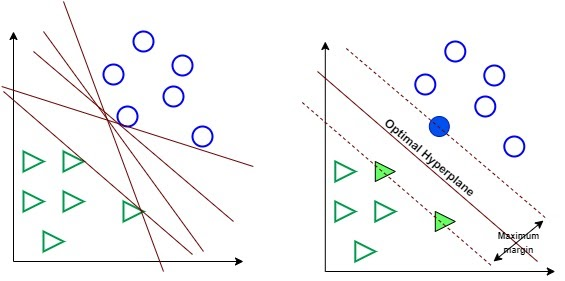

Beberapa keunggulan Support Vector Machine antara lain:

- SVM efektif pada data berdimensi tinggi (data dengan jumlah fitur atau atribut yang sangat banyak).

- SVM efektif pada kasus di mana jumlah fitur pada data lebih besar dari jumlah sampel.

- SVM menggunakan subset poin pelatihan dalam fungsi keputusan (disebut support vector) sehingga membuat penggunaan memori menjadi lebih efisien.

## **SVM Klasifikasi non Linier**

Pada data non-linear, decision boundary yang dihitung algoritma SVM bukan berbentuk garis lurus. Support Vector Classifier menggunakan sebuah metode yaitu “kernel trick” sehingga data dapat dipisahkan secara linier. Apa itu trik kernel? Ia adalah sebuah metode untuk mengubah data pada dimensi tertentu (misal 2D) ke dalam dimensi yang lebih tinggi (3D) sehingga dapat menghasilkan hyperplane yang optimal.

Berikut adalah beberapa fungsi kernel yang perlu Anda ketahui.

- Linear

- RBF (Radial Basis Function) atau Gaussian kernel

- Polinomial

- Sigmoid

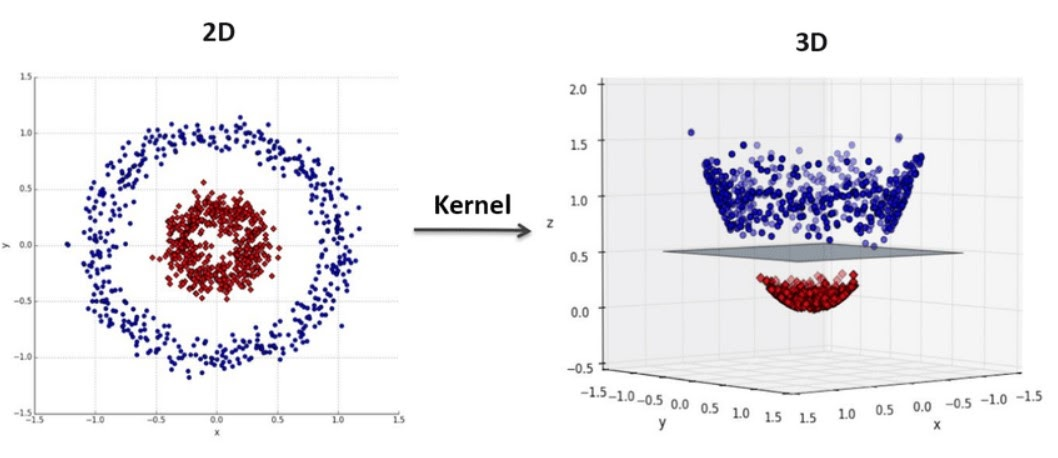

Pada masalah klasifikasi multi-kelas, SVM melakukan klasifikasi biner untuk masing-masing kelas. Model kemudian memisahkan kelas tersebut dari semua kelas lainnya, menghasilkan model biner sebanyak jumlah kelasnya.

Sebagai contoh, jika ada 3 buah kelas: donat, ayam, dan burger, SVM akan melakukan 3 kali klasifikasi. Pertama, membangun pemisah antara kelas donat dan kelas bukan donat. Kemudian membangun pemisah antara kelas ayam dan kelas bukan ayam, lalu pemisah antara kelas burger dan bukan kelas burger. Teknik inilah yang disebut dengan “One-vs-Rest”.

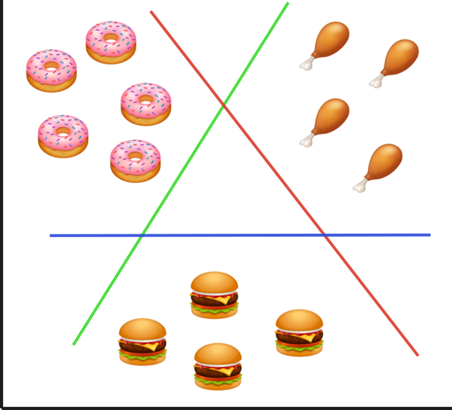

# **Data Preprocessing**

## **Panggil File diabetes.csv**

In [2]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/MyDrive/Kaggle'

In [3]:
!kaggle datasets download -d uciml/pima-indians-diabetes-database

  0% 0.00/8.91k [00:00<?, ?B/s]
100% 8.91k/8.91k [00:00<00:00, 15.2MB/s]


In [4]:
!unzip -q pima-indians-diabetes-database.zip -d .

In [5]:
import pandas as pd

df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## **Mengecek nilai null dan daftar nama kolom**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## **Memisahkan atribut dan label**

In [7]:
# memisahkan atribut pada dataset dan menyimpannya pada sebuah variabel
x = df[df.columns[:8]]

# memisahkan label pada dataset dan menyimpannya pada sebuah variabel
y = df['Outcome']

## **Standarisasi**

In [8]:
from sklearn.preprocessing import StandardScaler

# standarisasi nilai-nilai dari dataset
scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x)

## **Training dan Testing**

In [9]:
from sklearn.model_selection import train_test_split

# memisahkan data untuk training dan testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 42)

# **Membangun Model**

## **Membuat objek Support Vector Classifier**

In [10]:
from sklearn.svm import SVC

# membuat objek SVC dan memanggil fungsi fit untuk melatih model
clf = SVC()
clf.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Evaluasi Model

## **Akurasi prediksi dari model**

In [11]:
# Menampilkan skor akurasi prediksi
clf.score(x_test, y_test)

0.7559055118110236